In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib import gridspec
import pandas as pd
import os
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [7]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [14]:
g_grid = np.zeros([metal.size,age.size,len(tau)])
for i in range(metal.size):
    g_grid[i]=np.load('../data/m%s_gbf.npy' % metal[i]).T
    
age_conv = np.load('../data/light_weight_scaling_2.npy')

In [15]:
g_dist= g_grid[17].T[1:7]
l_dist= age_conv[17].T[1:7]

In [10]:
ultau=np.append(0,10**(np.array(tau[1:])-9))

In [11]:
def SFH(AGE,TAU):
    return AGE*np.exp(-AGE/TAU)

In [27]:
def LWA(dist,tau):
    top = np.zeros(len(dist))
    bottom = np.zeros(len(dist))

    for i in range(len(dist)):
        top[i] = np.trapz(SFH(age,tau)[0:i+1] * dist[0:i+1] * (age[i] - age[0:i+1]),age[0:i+1])
        bottom[i] = np.trapz(SFH(age,tau)[0:i+1]*dist[0:i+1],age[0:i+1])
    
    return top/bottom

def LWA_top(dist,tau):
    top = np.zeros(len(dist))

    for i in range(len(dist)):
        top[i] = np.trapz(SFH(age,tau)[0:i+1] * dist[0:i+1] * (age[i] - age[0:i+1]),age[0:i+1])
    
    return top
    

In [23]:
test = LWA(g_dist[5][::-1],ultau[6])

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


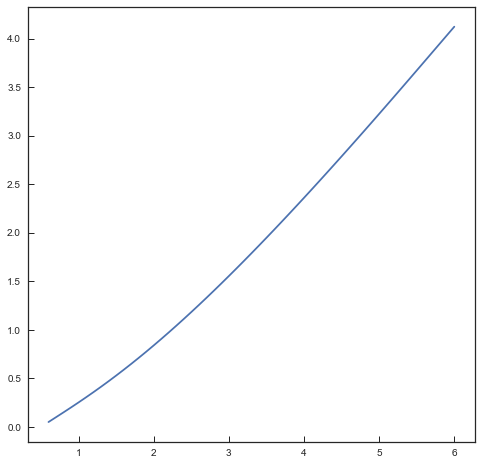

In [25]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(age,test)
# plt.plot(age,l_dist[5])

In [26]:
def B_weight(dist,t_star):
    t_prime = np.append(np.arange(t_star-.001,.501,-.1),.501)
    idist = interp1d(age,dist)
    return idist(t_prime)

def Top_dist(Z,t_star,log_tau):
    return B_weight(g_grid[np.argwhere(metal == Z)[0][0]].T[np.argwhere(np.array(tau) == log_tau)[0][0]],t_star)\
           *SFH(np.arange(0.5,t_star+0.1,.1),10**(log_tau -9))*(t_star - np.arange(0.5,t_star+0.1,.1))

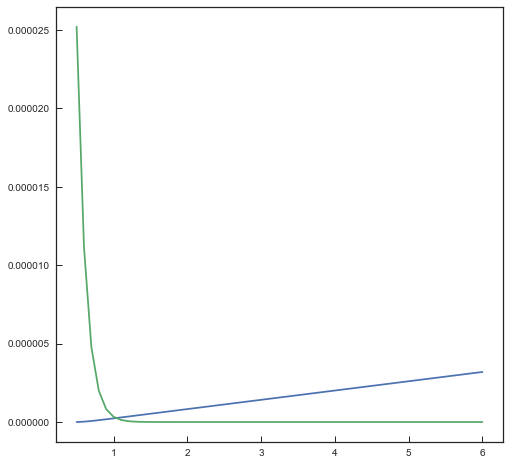

In [31]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(age,LWA_top(g_dist[0][::-1],ultau[1]))
plt.plot(age,Top_dist(metal[17],6,8.0))